<a href="https://colab.research.google.com/github/96harsh52/Bank_name_identification/blob/main/BANK_2nd_Release.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 
from matplotlib import pyplot as plt
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Conv2D 
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.regularizers import l1_l2
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
train_data_dir =  '/content/drive/My Drive/data1/'
validation_data_dir = '/content/drive/My Drive/data set/'

In [ ]:
batch_size = 20
img_width, img_height = 224,224

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=30,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,horizontal_flip=True,rescale = 1. / 255, 
                 shear_range = 0.3,fill_mode="nearest",vertical_flip=True,data_format='channels_last')
test_datagen = ImageDataGenerator(rescale = 1.0/ 255)

train_generator = train_datagen.flow_from_directory(train_data_dir, color_mode='rgba',
                             target_size =(img_width, img_height), batch_size = batch_size, class_mode ='categorical',
                              save_format='jpeg',interpolation='nearest',shuffle=True) 


  
validation_generator = test_datagen.flow_from_directory( validation_data_dir, color_mode='rgba',
                             target_size =(img_width, img_height), batch_size = batch_size, class_mode ='categorical',
                              save_format='jpeg',interpolation='nearest',shuffle=True)

                  
# if K.image_data_format() == 'channels_first':
#   input_shape = (3, img_width, img_height)
# else:
#     input_shape = (img_width, img_height, 4) 

Found 1384 images belonging to 25 classes.
Found 333 images belonging to 25 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu',padding='same',kernel_regularizer=l1_l2(0.01), bias_regularizer=l1_l2(0.01),kernel_initializer='glorot_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_regularizer=l1_l2(0.01), bias_regularizer=l1_l2(0.01),kernel_initializer='glorot_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_regularizer=l1_l2(0.01), bias_regularizer=l1_l2(0.01),kernel_initializer='glorot_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2))) 
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_regularizer=l1_l2(0.01), bias_regularizer=l1_l2(0.01),kernel_initializer='glorot_uniform'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_regularizer=l1_l2(0.01), bias_regularizer=l1_l2(0.01),kernel_initializer='glorot_uniform'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_regularizer=l1_l2(0.01), bias_regularizer=l1_l2(0.01),kernel_initializer='glorot_uniform'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu',padding='same',kernel_regularizer=l1_l2(0.01), bias_regularizer=l1_l2(0.01),kernel_initializer='glorot_uniform'))
model.add(Conv2D(256, (3, 3), activation='relu',padding='same',kernel_regularizer=l1_l2(0.01), bias_regularizer=l1_l2(0.01),kernel_initializer='glorot_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(25, activation='softmax'))


model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      1184      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)       

In [ ]:
model.compile(
loss ='categorical_crossentropy', 
                     optimizer ='Adam', 
                   metrics =['accuracy']) 

# DATA ARGUMANTETIONS 

# featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06,
#  rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
#  horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format='channels_last', validation_split=0.0, interpolation_order=1, dtype='float32'

history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=40,
                              epochs=50,
                              validation_steps=40,
                              verbose=1)

Epoch 1/50
40/40 [==============================] - 479s 12s/step - loss: 132.8598 - accuracy: 0.1199 - val_loss: 30.8640 - val_accuracy: 0.0420
Epoch 2/50
40/40 [==============================] - 268s 7s/step - loss: 13.7447 - accuracy: 0.1375 - val_loss: 6.8087 - val_accuracy: 0.0382
Epoch 3/50
40/40 [==============================] - 24s 588ms/step - loss: 5.3694 - accuracy: 0.1365 - val_loss: 5.3619 - val_accuracy: 0.0449
Epoch 4/50
40/40 [==============================] - 23s 575ms/step - loss: 4.8052 - accuracy: 0.1375 - val_loss: 5.0534 - val_accuracy: 0.0420
Epoch 5/50
40/40 [==============================] - 24s 593ms/step - loss: 4.7102 - accuracy: 0.1390 - val_loss: 4.9576 - val_accuracy: 0.0433
Epoch 6/50
40/40 [==============================] - 25s 632ms/step - loss: 4.6545 - accuracy: 0.1388 - val_loss: 5.0244 - val_accuracy: 0.0424
Epoch 7/50
40/40 [==============================] - 23s 576ms/step - loss: 4.6904 - accuracy: 0.1441 - val_loss: 4.7573 - val_accuracy: 0.043

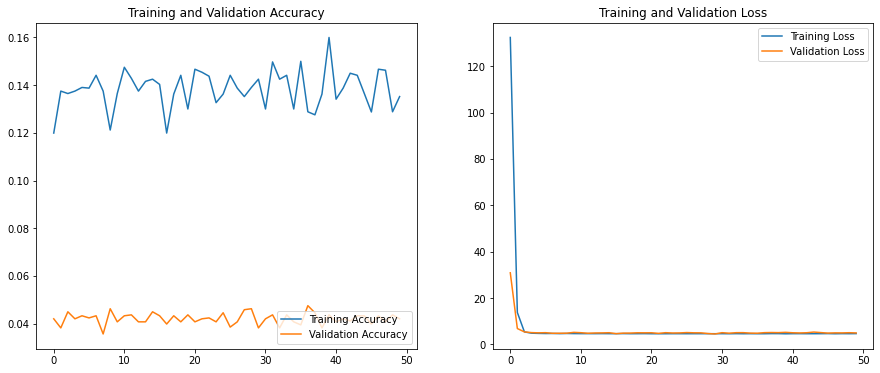

In [ ]:
import tensorflow as tf
from tensorflow import keras
import h5py

model.save('BANK2.h5')
loaded_model = keras.models.load_model('BANK2.h5')


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)#CHANGE AS PER NO.OF EPOCHES 

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()